In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Data provided by [London Datastore](https://data.london.gov.uk/). 

[License](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/) terms apply.

In [6]:

data_url = 'https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK_House_price_index.xlsx'

df_metadata = pd.read_excel(data_url, sheet_name = 'Metadata')
df_by_type = pd.read_excel(data_url, sheet_name = 'By type')
df_average_price = pd.read_excel(data_url, sheet_name = 'Average price',
                                 usecols = "A:AH, AJ, AK, AM:AU, AW")
df_index_price = pd.read_excel(data_url, sheet_name = 'Index Price')
df_sales_volume = pd.read_excel(data_url, sheet_name = 'Sales Volume')

Average Price:
Clean dataframe

In [7]:
# drop empty row
df_average_price = df_average_price.drop(df_average_price.index[0])
# format date column and make it index
df_average_price.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df_average_price.Date = pd.to_datetime(df_average_price.Date)
df_average_price = df_average_price.set_index('Date')
# check for missing values
df_average_price. isnull().values.any()
# express in thousands
df_average_price = df_average_price.div(1000)

False

Explore data

Current average prices per area

In [242]:
# split into meaningful categories
ldn_summary = ['Inner London','Outer London']
engl_regions =['NORTH EAST','NORTH WEST', 'YORKS & THE HUMBER','EAST MIDLANDS',
               'WEST MIDLANDS','EAST OF ENGLAND','LONDON','SOUTH EAST','SOUTH WEST']
#london boroughs
df_ldn = df_average_price
df_ldn = df_ldn.drop(columns=ldn_summary)
df_ldn = df_ldn.drop(columns=engl_regions)
df_ldn = df_ldn.drop(columns='England')

#london summary
df_ldn_summary = df_average_price[ldn_summary]

#england
df_engl = df_average_price[engl_regions]

Text(0.5, 1.0, 'England - Average House Prices: October2020')

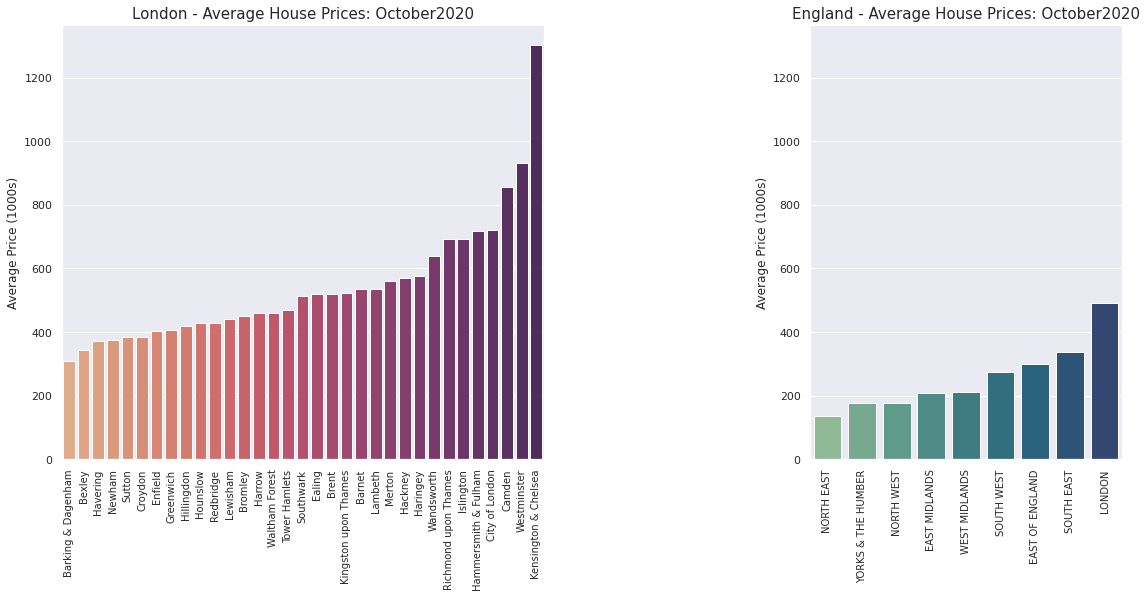

In [285]:
# plot
sns.set(rc={'figure.figsize':(19,8)})
plt.subplot(1, 2, 1)
to_plot = df_ldn.drop(df_average_price.index[0:rows-1])
to_plot = to_plot.sort_values(by = to_plot.index[0], axis = 1) 
b = sns.barplot(data=to_plot,palette='flare')
yl = b.get_ylim();
b.set_xticklabels(b.get_xticklabels(),
                  fontdict={'fontsize': 10}, rotation=90)

b.set_ylabel('Average Price (1000s)')
b.set_title('London - Average House Prices: '+ df_average_price.index[-1].month_name() +
            str(df_average_price.index[-1].year),  fontdict={'fontsize': 15})
plt.subplot(1, 3, 3)
to_plot = df_engl.drop(df_average_price.index[0:rows-1])
to_plot = to_plot.sort_values(by = to_plot.index[0], axis = 1) 
b = sns.barplot(data=to_plot, palette='crest')
b.set_ylim(yl)
b.set_xticklabels(b.get_xticklabels(),
                  fontdict={'fontsize': 10}, rotation=90)
b.set_ylabel('Average Price (1000s)')
b.set_title('England - Average House Prices: '+ df_average_price.index[-1].month_name() +
            str(df_average_price.index[-1].year),  fontdict={'fontsize': 15})

In [269]:
# some descriptives:
print('Average House Prices: '+ df_average_price.index[-1].month_name() +
            str(df_average_price.index[-1].year))
engl_desc = df_engl.drop(df_engl.index[0:rows-1])
engl_desc = engl_desc.sort_values(by = engl_desc.index[0], axis = 1) 
print('Least expensive English region: ' + engl_desc.columns[0] + ' at GBP ' + 
      str(np.round(engl_desc.iloc[0,0])))
print('Most expensive English region: ' + engl_desc.columns[-1] + ' at GBP ' + 
      str(np.round(engl_desc.iloc[0,-1])))

ldn_desc = df_ldn.drop(df_ldn.index[0:rows-1])
ldn_desc = ldn_desc.sort_values(by = ldn_desc.index[0], axis = 1) 
print('Least expensive London Borough: ' + ldn_desc.columns[0] + ' at GBP ' + 
      str(np.round(ldn_desc.iloc[0,0])))
print('Most expensive London Borough: ' + ldn_desc.columns[-1] + ' at GBP ' + 
      str(np.round(ldn_desc.iloc[0,-1])))


Average House Prices: October2020
Least expensive English region: NORTH EAST at GBP 136.0
Most expensive English region: LONDON at GBP 491.0
Least expensive London Borough: Barking & Dagenham at GBP 309.0
Most expensive London Borough: Kensington & Chelsea at GBP 1301.0


Price development over time per region

Text(0, 0.5, 'Average Price (1000s)')

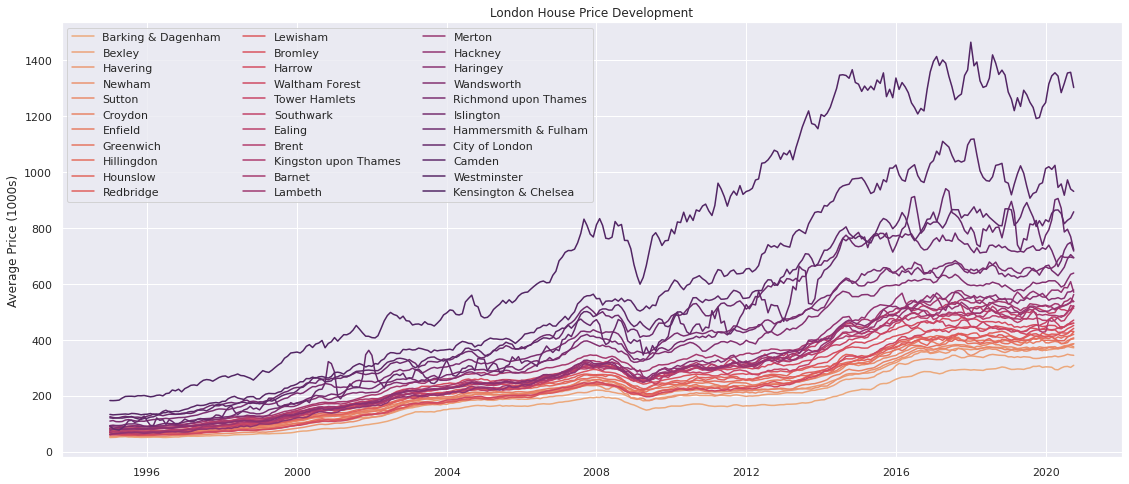

In [292]:
#London
colours = sns.set_palette('flare', n_colors = len(list(df_ldn)))
df_ldn = df_ldn.sort_values(by = df_ldn.index[-1], axis = 1) 
for region in df_ldn:
  plt.plot(df_ldn[region])
plt.legend(list(df_ldn),loc=2,ncol=3)
plt.title('London House Price Development')
plt.ylabel('Average Price (1000s)')

Text(0, 0.5, 'Average Price (1000s)')

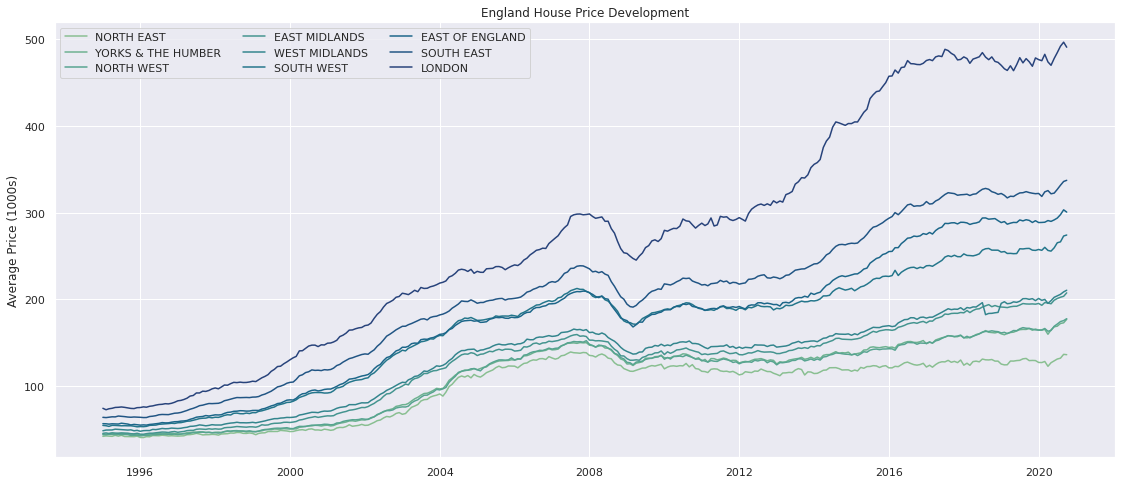

In [295]:
#England
colours = sns.set_palette('crest', n_colors = len(list(df_engl)))
df_engl = df_engl.sort_values(by = df_engl.index[-1], axis = 1) 
for region in df_engl:
  plt.plot(df_engl[region])
plt.legend(list(df_engl),loc=2,ncol=3)
plt.title('England House Price Development')
plt.ylabel('Average Price (1000s)')

,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST
Date,,,,,,,,,
1995-01-01,42.0764,43.9585,44.8034,45.5445,48.5275,56.7016,74.4358,64.0189,54.7052
1995-02-01,42.572,43.9254,44.5288,46.0516,49.3413,56.5936,72.7779,63.715,54.3561
1995-03-01,42.3697,44.4349,45.2005,45.3838,49.4422,56.1712,73.8968,64.1136,53.5831
1995-04-01,42.0958,44.2678,45.6143,46.1242,49.4559,56.5679,74.4553,64.6232,54.786
1995-05-01,43.2665,44.2236,44.831,45.878,50.3697,56.4798,75.432,64.5304,54.6988
...,...,...,...,...,...,...,...,...,...
2020-06-01,129.2,169.091,168.421,199.121,202.478,291.767,478.038,322.662,259.599
2020-07-01,131.272,171.624,169.181,201.103,204.203,293.858,484.709,326.941,265.373
2020-08-01,132.248,174.483,172.266,202.542,205.878,297.786,492.084,331.706,266.429
